In [ ]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# K-Means Clustering_Mall Customers
# Dokumentasi ChatGPT : https://chat.openai.com/share/5a010d63-4cdc-47ce-b1b2-7e9dc9273636


In [1]:
# menghubungkan googel colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Semester8/Machine Learning/lecture 6/dataset/Mall_Customers.csv"

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan lima baris pertama dari DataFrame
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Drop kolom 'CustomerID'
df.drop(columns=['CustomerID'], inplace=True)

# Menampilkan lima baris pertama dari DataFrame setelah menghapus fitur 'CustomerID'
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [7]:
# Mengubah nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan lima baris pertama dari DataFrame setelah perubahan
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 1, Inertia: 308862.06000000006
Number of clusters: 2, Inertia: 212889.44245524303
Number of clusters: 3, Inertia: 143391.59236035676
Number of clusters: 4, Inertia: 104414.67534220168
Number of clusters: 5, Inertia: 75427.71182424155
Number of clusters: 6, Inertia: 58348.641363315044
Number of clusters: 7, Inertia: 51575.2779310779
Number of clusters: 8, Inertia: 44359.634641148325
Number of clusters: 9, Inertia: 40942.51117006117
Number of clusters: 10, Inertia: 37515.84125504126


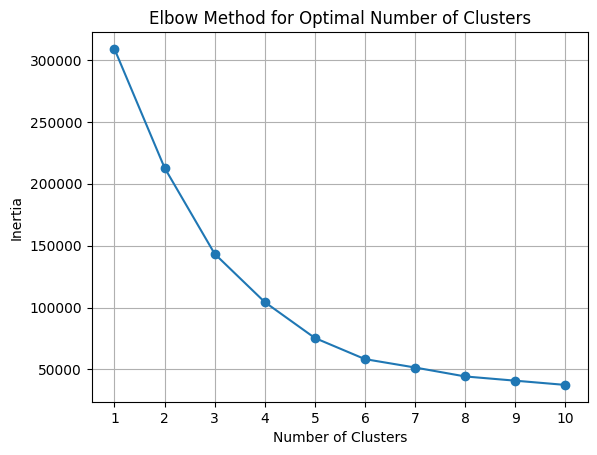

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Pilih fitur yang akan digunakan untuk clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Tentukan jumlah cluster yang akan diuji
num_clusters_range = range(1, 11)

# Inisialisasi list untuk menyimpan nilai inertia
inertia_values = []

# Lakukan iterasi untuk setiap jumlah cluster
for num_clusters in num_clusters_range:
    # Inisialisasi dan melatih model K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features)

    # Menambahkan inertia ke dalam list
    inertia_values.append(kmeans.inertia_)

# Menampilkan nilai inertia untuk setiap jumlah cluster
for num_clusters, inertia in zip(num_clusters_range, inertia_values):
    print(f"Number of clusters: {num_clusters}, Inertia: {inertia}")



import matplotlib.pyplot as plt

# Plot siku (elbow method)
plt.plot(num_clusters_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()





In [11]:
from sklearn.cluster import KMeans

# Pilih fitur yang akan digunakan untuk clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Tentukan jumlah cluster yang diinginkan
num_clusters = 5

# Inisialisasi dan melatih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Tambahkan label cluster ke dalam DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan lima baris pertama DataFrame dengan label cluster
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0


In [12]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,2
197,0,32,126,74,1
198,0,32,137,18,2


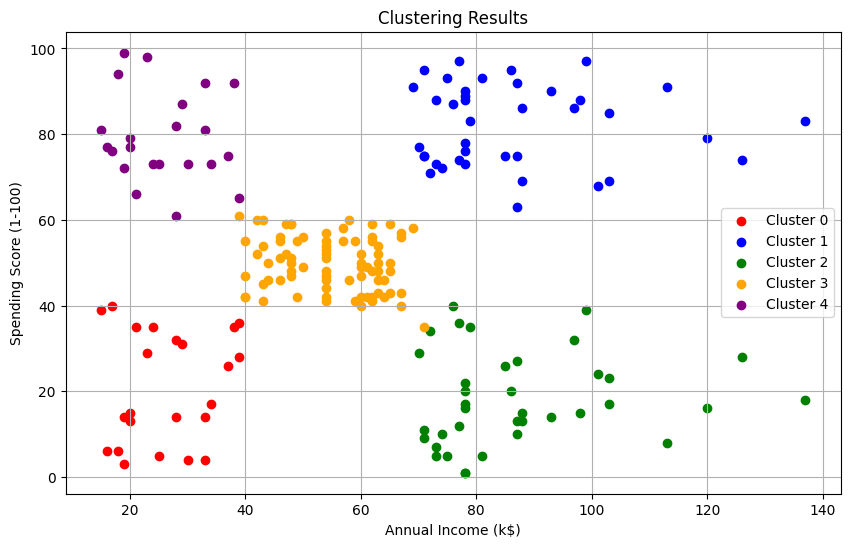

In [14]:
import matplotlib.pyplot as plt

# Pisahkan data untuk setiap cluster
cluster0 = df[df['Cluster'] == 0]
cluster1 = df[df['Cluster'] == 1]
cluster2 = df[df['Cluster'] == 2]
cluster3 = df[df['Cluster'] == 3]
cluster4 = df[df['Cluster'] == 4]

# Plot hasil klasterisasi menggunakan scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cluster0['Annual Income (k$)'], cluster0['Spending Score (1-100)'], label='Cluster 0', color='red')
plt.scatter(cluster1['Annual Income (k$)'], cluster1['Spending Score (1-100)'], label='Cluster 1', color='blue')
plt.scatter(cluster2['Annual Income (k$)'], cluster2['Spending Score (1-100)'], label='Cluster 2', color='green')
plt.scatter(cluster3['Annual Income (k$)'], cluster3['Spending Score (1-100)'], label='Cluster 3', color='orange')
plt.scatter(cluster4['Annual Income (k$)'], cluster4['Spending Score (1-100)'], label='Cluster 4', color='purple')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Pilih fitur yang akan digunakan untuk clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Tentukan jumlah cluster yang diinginkan
num_clusters = 5

# Inisialisasi dan melatih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Prediksi label klaster untuk setiap data
cluster_labels = kmeans.labels_

# Hitung Silhouette Score
silhouette_avg = silhouette_score(features, cluster_labels)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)


from sklearn.cluster import KMeans

# Pilih fitur yang akan digunakan untuk clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Tentukan jumlah cluster yang diinginkan
num_clusters = 5

# Inisialisasi dan melatih model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Hitung nilai inertia
inertia = kmeans.inertia_

# Tampilkan nilai inertia
print("Inertia:", inertia)



Silhouette Score: 0.44424291275274114
Inertia: 75427.71182424155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
